Notebook of Aadil Zikre </br>
EMAIL : azikre@syr.edu

In [ ]:
pip install transformers emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=9d796cc733616781fe0c239d4d764b1e19cb4fdb459dce9a86c3042d49eed719
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
# pulling these utils from my github to make experimentation easier
!curl -O https://raw.githubusercontent.com/aadil-zikre/amazon-reviews-sentiment-analysis/master/helper-utils/embeddings.py
!curl -O https://raw.githubusercontent.com/aadil-zikre/amazon-reviews-sentiment-analysis/master/helper-utils/models.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4557  100  4557    0     0  31212      0 --:--:-- --:--:-- --:--:-- 31212
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1885  100  1885    0     0  13464      0 --:--:-- --:--:-- --:--:-- 14067


# MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Reviews
Selecting the top 5000 reviews to work upon

In [ ]:
import pandas as pd
import numpy as np
import re

from nltk.collocations import *
from itertools import chain
from tqdm import tqdm
tqdm.pandas()

from nltk.stem import WordNetLemmatizer
from string import punctuation
  
lemmatizer = WordNetLemmatizer()

In [ ]:
""" Please run appropriate command to import the file."""

with open("/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 1/clothing_shoes_jewelry.txt",'r') as f:
  txt = f.read()

# with open('/drive/My Drive/Colab Notebooks/Mon_Homework1/clothing_shoes_jewelry.txt', 'r') as f:
#   txt = f.read() 

In [ ]:
txt_split = txt.split("\n\n")

In [ ]:
txt_split = txt_split[:-1]

In [ ]:
txt_chunks = [tuple(t.split("\n")) for t in txt_split]

In [ ]:
txt_dict = []
for i in txt_chunks:
    txt_dict.append(dict(tuple(t.split(":",maxsplit=1)) for t in i))

In [ ]:
df = pd.DataFrame(txt_dict)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [ ]:
assert (df.groupby("reviewerID").size()>=5).all(), "Check Again! Minimum Reviews per user should be 5" # checking if the import was correct

In [ ]:
assert (df.groupby("asin").size()>=5).all(), "Check Again! Minimum Reviews per item should be 5" # checking if the import was correct

In [ ]:
df.shape

(278677, 9)

In [ ]:
df = df[df.reviewText.progress_apply(len) > 0] # To remove Nulls 
df = df.iloc[:5000].reset_index(drop=True) # selecting just the first 5000 rows for this assignment

100%|██████████| 278677/278677 [00:00<00:00, 712707.55it/s]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette = "crest_r")

<Axes: xlabel='overall', ylabel='count'>

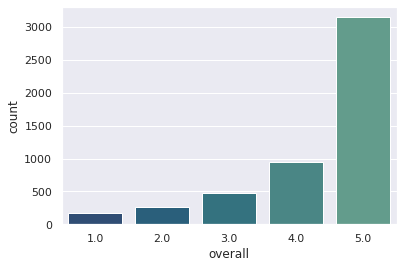

In [ ]:
sns.countplot(x = df.overall, order=sorted(df.overall.unique())) # To check the spread of reviews over the ratings

In [ ]:
df.unixReviewTime = pd.to_datetime(df.unixReviewTime, unit='s')

<Axes: xlabel='unixReviewTime', ylabel='count'>

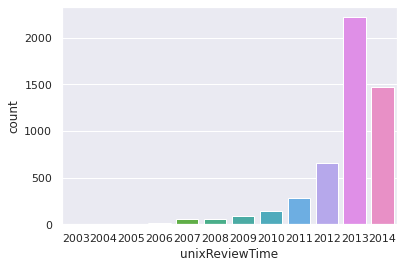

In [ ]:
sns.countplot(x = df.unixReviewTime.dt.year, order = sorted(df.unixReviewTime.dt.year.unique())) # Checking years in which the review was given

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,2011-02-12,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,2013-01-19,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,2013-01-04,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",2014-04-27,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,2014-03-15,"03 15, 2014"


# MAKING OF FILE FOR PREDICTION
The preprocessing done here is the same as last notebook. I only show it here for reference. In my own experiments, I have just imported the part 1 file of last task. I will be attaching it with the submission.

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_rev = df[['reviewText']] # we only need reviewText for further analysis

In [ ]:
# Strategy : This is the same as last assignment
# do sentense tokenize
# adjective words, capital word(s), or exclamation marks Calculate these:
# Sum up the columns by groupby on reviewText ID 
# If the sum is 0, remove reviews 
# Get Adjective Word List, Bigram List, Capital Word List, Exclaimation Mark 

In [ ]:
df_rev = df_rev.rename_axis("reviewText_ID", axis = 0).reset_index() # Providing a unique id to each review

In [ ]:
df_rev["reviewText_sents"] = df_rev.reviewText.progress_apply(nltk.sent_tokenize) # segmenting reviews into sentences

100%|██████████| 5000/5000 [00:00<00:00, 7838.65it/s]


In [ ]:
df_rev = df_rev.explode('reviewText_sents') # exploding df such that each row has a sentence

In [ ]:
# function to get list of adjectives from a given sentence
def get_adjective_word_list(sentence):
  word_list_w_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
  return [i for i,j in word_list_w_tags if j in ['JJ', 'JJR', 'JJS']]
  # https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

# function to get list of capital words from a given sentence
capital_pattern = re.compile(r"\b[A-Z]+\b")
def get_capital_word_list(sentence):
  return re.findall(capital_pattern,sentence)

# function to say whether a given sentence has exclamation marks
def contains_exlamation_mark(sentence):
  if "!" in sentence:
    return 1
  return 0

# function to get bigrams which have either verbs or adjectives in it
# we make the bigrams first, then search for bigrams with Verbs or Adjectives
stopwords = nltk.corpus.stopwords.words('english')
list_vaid_tags_for_bigrams = ('VB','JJ')
def get_bigrams(sentence):
  bigrams_list_w_tags = nltk.bigrams(nltk.pos_tag(nltk.word_tokenize(sentence)))
  bigrams_list_w_tags = [i for i in bigrams_list_w_tags if (i[0][1].startswith(list_vaid_tags_for_bigrams)) | (i[1][1].startswith(list_vaid_tags_for_bigrams))]
  bigrams_list_w_tags = [i for i in bigrams_list_w_tags if (i[0][0].lower() not in stopwords) & (i[1][0].lower() not in stopwords)]
  bigrams_list_w_tags = [i for i in bigrams_list_w_tags if (i[0][0] not in punctuation) & (i[1][0] not in punctuation)] 
  return bigrams_list_w_tags

In [ ]:
df_rev['adjective_words'] = df_rev['reviewText_sents'].progress_apply(get_adjective_word_list)
df_rev['capital_words'] = df_rev['reviewText_sents'].progress_apply(get_capital_word_list)
df_rev['contains_exclaimation'] = df_rev['reviewText_sents'].progress_apply(contains_exlamation_mark)

100%|██████████| 22032/22032 [00:00<00:00, 686646.65it/s]


In [ ]:
# removing all sentences where the none of the 3 conditions are met 
df_rev = df_rev[~df_rev.progress_apply(lambda x: True 
                     if (len(x['adjective_words']) == 0) & (len(x['capital_words']) == 0) & (x['contains_exclaimation'] == 0)
                     else False, axis = 1)]

100%|██████████| 22032/22032 [00:00<00:00, 31804.48it/s]


In [ ]:
df_rev['bigram_list_vb_adj'] = df_rev['reviewText_sents'].progress_apply(get_bigrams)

100%|██████████| 19209/19209 [00:36<00:00, 523.81it/s]


In [ ]:
all_adjectives = list(chain(*df_rev.adjective_words)) # Concatenating all adjective lists to get one list
all_bigrams = list(chain(*df_rev.bigram_list_vb_adj)) # Concatenating all bigrams lists to get one list
all_bigrams = [(i[0][0], i[1][0]) for i in all_bigrams] # taking out words from bigrams which are word,pos_tag pairs
all_bigrams = [(lemmatizer.lemmatize(i[0]), lemmatizer.lemmatize(i[1])) for i in all_bigrams] # Lemmatizing to see the words clearly 

In [ ]:
# calculation of length for various lists and strings
df_rev["reviewText_sent_len"] = df_rev["reviewText_sents"].progress_apply(len)
df_rev["bigrams_list_len"] = df_rev["bigram_list_vb_adj"].progress_apply(len)
df_rev["adjective_words_len"] = df_rev["adjective_words"].progress_apply(len)
df_rev["capital_words_len"] = df_rev["capital_words"].progress_apply(len)

100%|██████████| 19209/19209 [00:00<00:00, 670961.50it/s]


In [ ]:
df_rev[['reviewText_sent_len', 'bigrams_list_len', 'adjective_words_len','capital_words_len']].describe() # descriptive statistics on lengths obtained

,reviewText_sent_len,bigrams_list_len,adjective_words_len,capital_words_len
count,19209.000000,19209.000000,19209.000000,19209.000000
mean,81.744911,1.954240,1.645947,0.900672
std,60.887768,1.932438,1.484599,2.198032
min,1.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,1.000000,0.000000
50%,68.000000,2.000000,1.000000,1.000000
75%,103.000000,3.000000,2.000000,1.000000
max,1178.000000,32.000000,32.000000,180.000000


In [ ]:
display(df_rev.contains_exclaimation.value_counts()) # In absolute counts
display(df_rev.contains_exclaimation.value_counts(normalize = True) * 100) # In Percentages

0    17199
1     2010
Name: contains_exclaimation, dtype: int64

0    89.536155
1    10.463845
Name: contains_exclaimation, dtype: float64

In [ ]:
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 2" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_2_first_part_file.csv"

cols_to_export = ['reviewText_ID', 'reviewText', 'reviewText_sents', 'reviewText_sent_len', 
                  'adjective_words', 'bigram_list_vb_adj', 'capital_words', 'contains_exclaimation']
df_final = df_rev[cols_to_export].copy()
df_final['adjective_words'] = df_final['adjective_words'].progress_apply(lambda x: x if x else 0)
df_final['capital_words'] = df_final['capital_words'].progress_apply(lambda x: x if x else 0)
df_final.to_csv(f"{file_path}/{file_name}", index = False)
df_final.head()

100%|██████████| 19209/19209 [00:00<00:00, 719604.74it/s]


,reviewText_ID,reviewText,reviewText_sents,reviewText_sent_len,adjective_words,bigram_list_vb_adj,capital_words,contains_exclaimation
0,0,This is a great tutu and at a really great pri...,This is a great tutu and at a really great price.,49,"[great, great]","[((great, JJ), (tutu, NN)), ((really, RB), (gr...",0,0
0,0,This is a great tutu and at a really great pri...,It doesn't look cheap at all.,29,[cheap],"[((n't, RB), (look, VB)), ((look, VB), (cheap,...",0,0
0,0,This is a great tutu and at a really great pri...,I'm so glad I looked on Amazon and found such ...,88,"[glad, affordable]","[((affordable, JJ), (tutu, NN)), ((n't, RB), (...","[I, I]",0
0,0,This is a great tutu and at a really great pri...,A++,3,0,[],[A],0
1,1,I bought this for my 4 yr old daughter for dan...,I bought this for my 4 yr old daughter for dan...,133,"[old, first, adorable]","[((yr, RB), (old, JJ)), ((old, JJ), (daughter,...",[I],0


# MAKING THE LSTM MODELS FOR PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn
import re
import datetime
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader

from nltk import WordNetLemmatizer
import emoji

# Utility functions from TF
import keras
import tensorflow as tf 
from keras import layers
from keras import losses
from keras import utils
#from tensorflow.keras import preprocessing
from keras.utils import pad_sequences

from tqdm.notebook import tqdm
tqdm.pandas()

## PROCESS df_train
For training, I will be using Twitter Airline Sentiment Dataset from Kaggle

In [ ]:
"""Please change the file path here as per your drive structure. I will be attaching this file as well with the submission"""
df_train = pd.read_csv("/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/data/twitter_airline_sentiment/Tweets.csv")

In [ ]:
df_train = df_train[['airline_sentiment','text']]
df_train.rename(columns = {'text' : 'tweet', 'airline_sentiment' : 'sentiment'}, inplace=True) # we only need tweets and their sentiments for the model

<ipython-input-14-8d5428eb2cee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns = {'text' : 'tweet', 'airline_sentiment' : 'sentiment'}, inplace=True)


In [ ]:
df_train.sentiment.value_counts() # there is a lot more negative as compared to other sentiments. This may be a problem while training. Lets see!

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [ ]:
df_train.isnull().sum() # We do not have any nulls. Thats good.

sentiment    0
tweet        0
dtype: int64

In [ ]:
df_train[df_train.tweet == ''] # To see hidden nulls. Sometimes Empty rows are read as '' which are the same as null but stay in the file undetected

,sentiment,tweet


In [ ]:
# Neural networks take only integers as classes, so these are the dicts to convert the classes to integers and back to classes
sentiment_map_id = {'neutral' : 1, 'positive' : 2, 'negative' : 0} 
sentiment_map_id_inv = {v:k for k,v in sentiment_map_id.items()}

In [ ]:
df_train['sentiment_id'] = df_train.sentiment.map(sentiment_map_id)

In [ ]:
from nltk import TweetTokenizer
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_train.iloc[0]

sentiment                                   neutral
tweet           @VirginAmerica What @dhepburn said.
sentiment_id                                      1
Name: 0, dtype: object

In [ ]:
TweetTokenizer().tokenize("@VirginAmerica What @dhepburn said. #injustice")

['@VirginAmerica', 'What', '@dhepburn', 'said', '.', '#injustice']

In [ ]:
nltk.word_tokenize("@VirginAmerica What @dhepburn said. #injustice")

['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.', '#', 'injustice']

In [ ]:
# we want to preserve @ and #, therefore we will use tweettokenizer

In [ ]:
slangs = {"afap":"as far as possible", "aab":"average at best", "aak":"alive and kicking", "aamof":"as a matter of fact", "aap":"always a pleasure", "aar":"at any rate", "aayf":"as always: your friend", "abd":"already been done", "admin":"administrator", "adn":"any day now", "aeae":"and ever and ever", "aeap":"as early as possible", "afaiac":"as far as i am concerned", "afaic":"as far as i am concerned", "afaics":"as far as i can see", "afaict":"as far as i can tell", "afaik":"as far as i know", "afair":"as far as i remember", "afc":"always from computer", "agw":"all going well", "afd":"all fucking day", "aft":"about fucking time", "b4":"before", "bb":"bye bye", "bbiab":"be back in a bit", "bbl":"be back later", "bbs":"be back soon", "bd":"big deal", "brb":"be right back", "brt":"be right there", "btw":"by the way", "cu":"see you", "cul":"see you later", "cuz":"because", "cya":"see you", "da":"the", "dat":"that", "der":"there", "dunno":"do not know", "fwiw":"for what it is worth", "fyi":"for your information", "g2g":"got to go", "gtg":"got to go", "gal":"get a life", "gfy":"good for you", "gonna":"going to", "icydk":"in case you do not know", "idgi":"i do not get it", "idk":"i do not know", "ily":"i love you", "ilu":"i love you", "imho":"in my honest opinion", "imo":"in my opinion", "irl":"in real life", "jj":"just joking", "jk":"just kidding", "k":"okay", "kk":"ok cool", "l8r":"later", "lmao":"laughing my ass off", "lmfao":"laughing my fucking ass off", "lol":"laughing out loud", "myob":"mind your own business", "noyb":"none of your business", "np":"no problem", "nsfw":"not safe for work", "nvm":"never mind", "omg":"oh my god", "pic":"picture", "ot":"off topic", "pix":"pictures", "plz":"please", "pls":"please", "ppl":"people", "rofl":"rolling on the floor laughing", "roflmao":"rolling on the floor laughing my ass off", "roflmaol":"rolling on the floor laughing my ass out loud", "smh":"shaking my head", "thnx":"thanks", "tho":"though", "tia":"thanks in advance", "ttyl":"talk to you later", "ttyt":"talk to you tomorrow", "ty":"thank you", "u":"you", "w8":"wait", "wanna":"want to", "wb":"welcome back", "wd":"well done", "im":"i am", "you've":"you have", "how'd":"how did", "i'm":"i am", "n't":"not", "we're":"we are", "you're":"you are"}
negated = {"weren't":"were not", "hadn't": "had not", "wouldn't": "would not", "mustn't": "must not", "aren't": "are not", "wasn't": "was not", "couldn't": "could not", "shan't": "shall not", "haven't": "have not", "mightn't": "might not", "doesn't": "does not", "needn't": "need not", "don't": "do not", "isn't": "is not", "hasn't": "has not", "doesn't": "does not", "didn't": "did not", "won't": "will not", "oughtn't": "ought not", "shouldn't": "should not", "cannot": "can not", "can't": "can not"}
emoticons = ["[: )", ":-]", ":-3", ":->", "8-)", ":-}", ":)", ":]", ":3", ":>", "8)", ":}", ":o)", ":c)", ":^)", "=]", "=)", ":-))", ": D", "8 D", "x D", "X D", ":D", "8D", "xD", "XD", "=D", "=3", "B^D", ":-*", ":*", ":×'", "; )", "*-)", "; ]", ";)", "*)", ";]", ";^)", ": ,", ";D", "<3", "(:", ": (", ": c", ": <", ": [", ":(", ":c", ":<", ":[", ":-||", ">:[", ":{", ":@", ">:(", ":' (", ":'(", "D ':", "D:<", "D:", "D8", "D;", "D=", "DX", ": O", ": o", ":O", ":o", ":-0", "8 0", ">:O"]

In [ ]:
def char_is_emoji(character):
    #en_emoji = emoji.UNICODE_EMOJI.get("en")
    #return character[0] in emoji.UNICODE_EMOJI_ENGLISH
    return emoji.is_emoji(character[0])

def text_has_emoji(text):
    for character in text:
        if char_is_emoji(character):
            return True
    return False

In [ ]:
# REFERENCE : Class Lab
# ADDED FUNCTIONALITY : Provision to specify if lemmatization and stop word removal should be done
def clean_tweets(texts, lemmatize = True, remove_stop_words=True, return_hash_emos = False):
    cleaned_tweets = [] # This will be our return list
    hash_emos = [] # This is an overall list of emoticons and emojis

    # Loop over the full list of texts provided
    for text in texts:
        hash_emo = [] # Initialize an empty list for this one text

        # These make substitutions of short tags in place of repeating
        # exclamation marks and/or question marks.
        text = re.sub('(!){2,}', ' <!repeat> ', text)
        text = re.sub('(\?){2,}', ' <?repeat> ', text)
        
        # Tokenize using tweet tokenizer: This will treat each emoji as
        # its own token.
        tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=False, reduce_len=True)
        tokens = tokenizer.tokenize(text.lower())
        
        
        # Emojis and emoticons
        if text_has_emoji(text): # Examine the untokenized text
            temp = [] # Make temporary storage for the modified tokens
            for tok in tokens: # Cycle through each token in this text
                # If the token is an emoji, look up the equivalent
                # plain text placeholder.
                if char_is_emoji(tok): 
                    hash_emo.append(emoji.demojize(tok))
                elif tok in emoticons:
                    hash_emo.append(tok)
                else:
                    temp.append(tok)
            tokens = temp
            
        # Hashtags
        temp = []
        for word in tokens:
            if '#' in word: # Do a simple substitution using the empty string
                word = word.replace('#','')
                hash_emo.append(word)
            else:
                temp.append(word)
        tokens = temp
            
        # Replace slangs and negated words
        temp = []
        for word in tokens:
            if word in slangs:
                temp += slangs[word].split()
            elif word in negated:
                temp += negated[word].split()
            else:
                temp.append(word)
        tokens = temp

        # Replace user names
        tokens = ['<user>'  if '@' in word else word for word in tokens]
        
        #Replace numbers
        tokens = ['<number>' if word.isdigit() else word for word in tokens]
        
        # Remove urls
        tokens = ['' if 'http' in word else word for word in tokens]
        
        # Lemmatize
        if lemmatize:
          lemmatizer = WordNetLemmatizer()
          tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        # Remove stop words
        if remove_stop_words:
          stop_word_list = nltk.corpus.stopwords.words('english')
          tokens = [word for word in tokens if word not in stop_word_list]

        # Remove tokens having length 1
        tokens = [word for word in tokens if word != '' and len(word) > 1]
        
        cleaned_tweets.append(" ".join(tokens))
        hash_emos.append(hash_emo)

    if return_hash_emos:
      return cleaned_tweets, hash_emos
    
    return cleaned_tweets

In [ ]:
# Demonstration of added functionality
print(clean_tweets(["@VirginAmerica What @dhepburn said crying. #injustice"], lemmatize = True, remove_stop_words=True))
print(clean_tweets(["@VirginAmerica What @dhepburn said crying. #injustice"], lemmatize = False, remove_stop_words=True))
print(clean_tweets(["@VirginAmerica What @dhepburn said crying. #injustice"], lemmatize = True, remove_stop_words=False))
print(clean_tweets(["@VirginAmerica What @dhepburn said crying. #injustice"], lemmatize = False, remove_stop_words=False))

['<user> <user> said cry']
['<user> <user> said crying']
['<user> what <user> said cry']
['<user> what <user> said crying']


In [ ]:
# creating 4 columns with various combinations of cleaning tweets
print(f"{datetime.datetime.now()} :: Starting")
df_train['clean_tweets'] = clean_tweets(df_train.tweet, lemmatize = True, remove_stop_words=True)
print(f"{datetime.datetime.now()} :: clean_tweets finished")
df_train['clean_tweets_no_lm'] = clean_tweets(df_train.tweet, lemmatize = False, remove_stop_words=True)
print(f"{datetime.datetime.now()} :: clean_tweets_no_lm finished ")
df_train['clean_tweets_no_sw'] = clean_tweets(df_train.tweet, lemmatize = True, remove_stop_words=False)
print(f"{datetime.datetime.now()} :: clean_tweets_no_sw finished")
df_train['clean_tweets_no_lm_no_sw'] = clean_tweets(df_train.tweet, lemmatize = False, remove_stop_words=False)
print(f"{datetime.datetime.now()} :: clean_tweets_no_lm_no_sw finished")

2023-04-12 04:50:14.908029 :: Starting
2023-04-12 04:50:20.824411 :: clean_tweets finished
2023-04-12 04:50:26.562037 :: clean_tweets_no_lm finished 
2023-04-12 04:50:30.556505 :: clean_tweets_no_sw finished
2023-04-12 04:50:33.121168 :: clean_tweets_no_lm_no_sw finished


In [ ]:
df_train.head()

,sentiment,tweet,sentiment_id,clean_tweets,clean_tweets_no_lm,clean_tweets_no_sw,clean_tweets_no_lm_no_sw
0,neutral,@VirginAmerica What @dhepburn said.,1,<user> <user> said,<user> <user> said,<user> what <user> said,<user> what <user> said
1,positive,@VirginAmerica plus you've added commercials t...,2,<user> plus added commercial experience ... tacky,<user> plus added commercials experience ... t...,<user> plus you have added commercial to the e...,<user> plus you have added commercials to the ...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1,<user> today ... must mean need take another trip,<user> today ... must mean need take another trip,<user> did not today ... must mean need to tak...,<user> did not today ... must mean need to tak...
3,negative,@VirginAmerica it's really aggressive to blast...,0,<user> really aggressive blast obnoxious enter...,<user> really aggressive blast obnoxious enter...,<user> it's really aggressive to blast obnoxio...,<user> it's really aggressive to blast obnoxio...
4,negative,@VirginAmerica and it's a really big bad thing...,0,<user> really big bad thing,<user> really big bad thing,<user> and it's really big bad thing about it,<user> and it's really big bad thing about it


## SAVE IMPORT df_train

In [ ]:
# saving this preprocessed file for easy access
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/data" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_3_processed_training_file.csv"
# df_train.to_csv(f"{file_path}/{file_name}") # this is to save the file. Uncomment to use
df_train = pd.read_csv(f"{file_path}/{file_name}") # this is to load the file

In [ ]:
print(len(df_train.clean_tweets.str.split().max())) # max length of sentence here is 14, we will set the model max length to 32
print(len(df_train.clean_tweets_no_lm.str.split().max()))
print(len(df_train.clean_tweets_no_sw.str.split().max()))
print(len(df_train.clean_tweets_no_lm_no_sw.str.split().max()))

14
14
10
10


In [ ]:
df_train.shape

(14640, 8)

## EXPERIMENTING WITH PREPROCESSING OF TWITTER TEXT 

In this section, I will go through the four columns we created above in which we vary the lemmatization and stop word removal in each column.</br>
</br>
Everything (Model, Tokenization) will stay the same for the following 4 experiments and only variable will be the column in consideration for embedding creation. 

### EXPT 1 : text with lemmatization and stop word removal
EMBEDDINGS : BERT </br>

In [ ]:
df = df_train
col = 'clean_tweets'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
# it is a class that takes df, col and various other attributes to give X and Y for training. Please see my github or /content for source code
from embeddings import BertProcessor 

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM # this is a wrapper on BiLSTM model covered in class. It takes various attributes and creates a model and also trains it.
# see my github or /content for source code
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 80.36%
Last Layer Validation Accuracy : 77.02%


### EXPT 2 : text without lemmatization but with stop words removal
EMBEDDINGS : BERT </br>

In [ ]:
df = df_train
col = 'clean_tweets_no_lm'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 80.45%
Last Layer Validation Accuracy : 76.64%


### EXPT 3 : text with lemmatization but without stop words removal
EMBEDDINGS : BERT </br>

In [ ]:
df = df_train
col = 'clean_tweets_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 84.96%
Last Layer Validation Accuracy : 80.93%


### EXPT 4 : text without lemmatization and without stop word removal
EMBEDDINGS : BERT </br>

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
save_dir = '/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/models'

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2, save_dir=save_dir)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 85.04%
Last Layer Validation Accuracy : 80.93%


## SUMMARY OF USING LEMMATIZATION AND STOP WORDS REMOVAL

I ran four experiments above. I processed the tweets in various ways like lemmatization and stop words removal to various extents and got very different results. The embeddings I used were Bert-Base-Cased Embeddings. I ran each experiments for 5 epochs and recorded the validation set accuracy at the end of each epoch. Here are the results: </br>
1. 81.58% when no lemmatization neither stop words removal was done
2. 80.93% when only lemmatization was done 
3. 76.64% when only stop word removal was done
4. 77.02% when both lemmatization and stop word removal were done. </br>
<br>
Results may vary on reruns due to randomness in weight initialization 
---
We can infer from the result the following things:</br>
1. Stop Word removal degrades the model by about 4% in its respective experiments ie 1&3 and 2&4
2. Lemmatization has a very small effect as compared to stop word removal on the overall performace but is still a negative effect
---
Conclusion: <br>
The results surprised me but on reading a few articles and research papers online, the results seem right. That is because what we are doing is essentially using a pretrained model for downstream task which is classification in my case. Hence, the data should be provided in the same way as the training of the pretrained model. In bert's case, all the data passed to it was unprocessed in a sense that at least lemmatization and stop words removal was not done. Hence its attention mechanism is used to seeing certain words together. If we change the input sequence drastically, it is like feeding it a outlier, in which case the output which is the embeddings may be very different depending on which words we removed. On some corpuses, it wouldn't matter but my experimentation showed that doing preprocessing is only hurting the performace. </br>

Therefore, for the experiments going forward, I will use the text where neither lemmatization nor stop words removal is done. 

---
References: </br>
1. https://stackoverflow.com/questions/63633534/is-it-necessary-to-do-stopwords-removal-stemming-lemmatization-for-text-classif#:~:text=A%20case%20for%20not%20using,are%20considered%20to%20be%20stopwords.
2. https://arxiv.org/pdf/1904.07531.pdf
3. https://aclanthology.org/W19-6203.pdf

## EXPT 5 : dropouts of 0.5 in dense layers
EMBEDDINGS : BERT </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.5
dp_layer_2 = 0.5

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 83.11%
Last Layer Validation Accuracy : 80.87%


## EXPT 6 : no dropouts in dense layers
EMBEDDINGS : BERT </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0 # setting these to 0 will remove dropout layer (by my class design)
dp_layer_2 = 0 # see models.py for more clarity

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 451,459
Trainable params: 451,459
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
172/172 [==============================] - 9s 27ms/step - loss: 0.6053 - accuracy: 0.7516 - val_loss: 0.51

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 85.01%
Last Layer Validation Accuracy : 79.23%


## EXPT 7 : 100% dropout in both dense layers (For baseline Accuracy)
EMBEDDINGS : BERT </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.999 # setting these to 0 will remove dropout layer (by my class design)
dp_layer_2 = 0.999 # see models.py for more clarity

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 128)              426496    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                      

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 62.80%
Last Layer Validation Accuracy : 61.67%


## NOTE ON ELMO
Elmo embeddings are very heavy. As such I had to run it on personal pc and save the embeddings of 14000 tweets in numpy matrix and export it here. The size of matrix is about 8.4 GB for each column. As such, I will not be able to upload it in the submission artifacts.

## EXPT 8 : Elmo with 10% dropout
EMBEDDINGS : ELMO </br>
COLUMN : TWEETS W/ Lemmatization W/ Stop Word Removal

In [ ]:
# df = df_train
# col = 'clean_tweets'
MODEL_MAX_LENGTH = 24
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# BATCH_SIZE = 64

from sklearn.model_selection import train_test_split

random_state = 12345
TEST_SIZE = 0.25

In [ ]:
rows_to_load = 14640
X = np.zeros((rows_to_load,24,1024))
with open('/content/drive/MyDrive/Personal Projects/data/Emb.txt', mode='r') as f:
  row = 0
  while row < rows_to_load:
    if row%1000 == 0: print(f'{datetime.datetime.now()} :: {row} rows done for X!!')
    X[row] = np.array(f.readline().replace('\n','').split()).reshape(-1,1024)
    row += 1
print('X : all done!!')

Y = pd.read_csv("/content/drive/MyDrive/Personal Projects/data/label.csv", names = ['index','label'], header=0).iloc[:,1].map(sentiment_map_id).values
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=TEST_SIZE, random_state = random_state)

2023-04-14 02:24:40.445270 :: 0 rows done for X!!
2023-04-14 02:25:18.773892 :: 1000 rows done for X!!
2023-04-14 02:25:51.404257 :: 2000 rows done for X!!
2023-04-14 02:26:21.687679 :: 3000 rows done for X!!
2023-04-14 02:26:56.977630 :: 4000 rows done for X!!
2023-04-14 02:27:27.732586 :: 5000 rows done for X!!
2023-04-14 02:28:01.203114 :: 6000 rows done for X!!
2023-04-14 02:28:32.727551 :: 7000 rows done for X!!
2023-04-14 02:29:05.492717 :: 8000 rows done for X!!
2023-04-14 02:29:35.530830 :: 9000 rows done for X!!
2023-04-14 02:30:06.360666 :: 10000 rows done for X!!
2023-04-14 02:30:38.853606 :: 11000 rows done for X!!
2023-04-14 02:31:08.711643 :: 12000 rows done for X!!
2023-04-14 02:31:41.783197 :: 13000 rows done for X!!
2023-04-14 02:32:12.499315 :: 14000 rows done for X!!
X : all done!!


In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 1024 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1 
dp_layer_2 = 0.1 

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              557568    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 62.80%
Last Layer Validation Accuracy : 61.67%


## EXPT 9 : Elmo with 50% and 10% dropout
EMBEDDINGS : ELMO </br>
COLUMN : TWEETS W Lemmatization W Stop Word Removal

In [ ]:
# df = df_train
# col = 'clean_tweets'
MODEL_MAX_LENGTH = 24
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# BATCH_SIZE = 64

from sklearn.model_selection import train_test_split

random_state = 12345
TEST_SIZE = 0.25

In [ ]:
rows_to_load = 14640
X = np.zeros((rows_to_load,24,1024))
with open('/content/drive/MyDrive/Personal Projects/data/Emb.txt', mode='r') as f:
  row = 0
  while row < rows_to_load:
    if row%1000 == 0: print(f'{datetime.datetime.now()} :: {row} rows done for X!!')
    X[row] = np.array(f.readline().replace('\n','').split()).reshape(-1,1024)
    row += 1
print('X : all done!!')

Y = pd.read_csv("/content/drive/MyDrive/Personal Projects/data/label.csv", names = ['index','label'], header=0).iloc[:,1].map(sentiment_map_id).values
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=TEST_SIZE, random_state = random_state)

2023-04-14 15:35:43.019495 :: 0 rows done for X!!
2023-04-14 15:36:19.804270 :: 1000 rows done for X!!
2023-04-14 15:36:49.329542 :: 2000 rows done for X!!
2023-04-14 15:37:18.762537 :: 3000 rows done for X!!
2023-04-14 15:37:48.599285 :: 4000 rows done for X!!
2023-04-14 15:38:15.829480 :: 5000 rows done for X!!
2023-04-14 15:38:44.482244 :: 6000 rows done for X!!
2023-04-14 15:39:14.561211 :: 7000 rows done for X!!
2023-04-14 15:39:42.726065 :: 8000 rows done for X!!
2023-04-14 15:40:08.848908 :: 9000 rows done for X!!
2023-04-14 15:40:36.590351 :: 10000 rows done for X!!
2023-04-14 15:41:07.094387 :: 11000 rows done for X!!
2023-04-14 15:41:36.003195 :: 12000 rows done for X!!
2023-04-14 15:42:01.206517 :: 13000 rows done for X!!
2023-04-14 15:42:31.871659 :: 14000 rows done for X!!
X : all done!!


In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 1024 # (Constant for Elmo)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.5 
dp_layer_2 = 0.1 

model_name = f"elmo_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
save_dir = '/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/models'

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              557568    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 84.11%
Last Layer Validation Accuracy : 78.44%


## EXPT 10 : Elmo with 50% and 10% dropout on text with no lem and no sw
EMBEDDINGS : ELMO </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
# df = df_train
# col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 24
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# BATCH_SIZE = 64

from sklearn.model_selection import train_test_split

random_state = 12345
TEST_SIZE = 0.25

In [ ]:
rows_to_load = 14640
X = np.zeros((rows_to_load,24,1024))
with open('/content/drive/MyDrive/Personal Projects/data/ELMO_no_lm_no_sw_trunc.txt', mode='r') as f:
  row = 0
  while row < rows_to_load:
    if row%1000 == 0: print(f'{datetime.datetime.now()} :: {row} rows done for X!!')
    X[row] = np.array(f.readline().replace('\n','').split()).reshape(-1,1024)
    row += 1
print('X : all done!!')

Y = pd.read_csv("/content/drive/MyDrive/Personal Projects/data/label_trunc.csv", names = ['index','label'], header=0).iloc[:,1].map(sentiment_map_id).values
Y = pd.get_dummies(Y).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=TEST_SIZE, random_state = random_state)

2023-04-15 16:40:07.632466 :: 0 rows done for X!!
2023-04-15 16:40:42.965304 :: 1000 rows done for X!!
2023-04-15 16:41:11.140692 :: 2000 rows done for X!!
2023-04-15 16:41:41.077638 :: 3000 rows done for X!!
2023-04-15 16:42:08.977002 :: 4000 rows done for X!!
2023-04-15 16:42:35.620115 :: 5000 rows done for X!!
2023-04-15 16:43:03.773311 :: 6000 rows done for X!!
2023-04-15 16:43:29.835843 :: 7000 rows done for X!!
2023-04-15 16:43:57.196737 :: 8000 rows done for X!!
2023-04-15 16:44:26.339160 :: 9000 rows done for X!!
2023-04-15 16:44:52.741904 :: 10000 rows done for X!!
2023-04-15 16:45:17.577050 :: 11000 rows done for X!!
2023-04-15 16:45:44.811091 :: 12000 rows done for X!!
2023-04-15 16:46:14.037544 :: 13000 rows done for X!!
2023-04-15 16:46:41.540300 :: 14000 rows done for X!!
X : all done!!


In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 1024 # (Constant for Elmo)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.5 
dp_layer_2 = 0.1 

model_name = f"elmo_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
save_dir = '/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/models'

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              557568    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 87.79%
Last Layer Validation Accuracy : 80.30%


## EXPT 11 : XLNet with 0.5 dropouts
EMBEDDINGS : XLNet </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import XLNetProcessor

emb_proc = XLNetProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.5
dp_layer_2 = 0.5

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 77.68%
Last Layer Validation Accuracy : 76.91%


## EXPT 12 : XLNet with 0.1 dropouts
EMBEDDINGS : XLNet </br>
COLUMN : TWEETS W/O Lemmatization W/O Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
from embeddings import XLNetProcessor

emb_proc = XLNetProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"xlnet_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
save_dir = '/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/models'

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 79.60%
Last Layer Validation Accuracy : 76.86%


## EXPT 13 : XLNet with clean_tweets
EMBEDDINGS : XLNet </br>
COLUMN : TWEETS W/ Lemmatization W/ Stop Word Removal

In [ ]:
df = df_train
col = 'clean_tweets'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25

In [ ]:
# XLNetProcessor is again a class that I made to ingest df and based on the column, provide x and y for training
# Please refer to my github or /content for source code
from embeddings import XLNetProcessor

emb_proc = XLNetProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state)
X_train, X_test, Y_train, Y_test = emb_proc.get_training_XY(test_size = TEST_SIZE)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test

dp_lstm = 0.2
dp_layer_1 = 0.5
dp_layer_2 = 0.5

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
# save_dir

In [ ]:
from models import BiLSTM
model_class = BiLSTM(lstm_output, MODEL_MAX_LENGTH, EMBEDDING_SIZE, n_classes, model_name,
                     dp_lstm=dp_lstm, dp_layer_1=dp_layer_1, dp_layer_2=dp_layer_2)
model_class.build_model()
history = model_class.train(BATCH_SIZE, EPOCHS, X_train, Y_train, X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              426496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model_class.save_model()

In [ ]:
print(history.params)
print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")

{'verbose': 1, 'epochs': 5, 'steps': 172}
Last Layer Training Accuracy : 70.90%
Last Layer Validation Accuracy : 71.01%


## NOTE ON DROPOUTS :    
I tried 4 different dropout configurations: </br>
1. Expt 7 : ~100% dropout in dense layers
2. Expt 5 : 50% dropout in dense layers
3. Expt 4 : 10% dropout in dense layers
4. Expt 6 : 0% dropout in dense layers
---
Results are as follows : 
1. Adding No Dropout makes the training model accuracy go over validation accuracy in second iteration only. In other words, Model Starts overtraining after 2nd iteration only
2. Adding a 10% dropout delayed overtraining by 1 epoch. 
3. Adding a 50% dropout delayed the overtraining by 1 epoch.
4. Adding a 100% dropout was done to establish a baseline and to see if the model is working as expected. Hence it is not really a part of this analysis. 
---
Conclusion : 
Based on the results above, I have decided to use 10% dropout in both the layers because the difference in accuracy between training and validation is not huge as compared to 50% dropout model. Also, I think adding a 50% dropout to layer whose trainable parameters are only 64 and 128 seems too large and it might hurt in the predictions of unseen test set. 


## NOTE ON EPOCHS
I did not run experiments with varying epochs as all the models which I trained were getting trained perfectly in only 2-3 epochs when the dropout was not very high. So, adding epochs would have only overtrained the models. 

## FINAL VERDICT

Keeping everything constant, ie column being one with no lemmatization and no stopword removal and dropouts in lstm dense layers being 0.1, we arrive at the following results:
1. Bert  : Expt 4  : 84% : before model started getting overtrained
2. Elmo  : Expt 10 : 83% : before model started getting overtrained
3. XLNet : Expt 12 : 78% : before model started getting overtrained
---
Hence, the winner is Bert and that is what I will be using for making predictions on the reviewTexts and comparing sentiment counts with previous assignment.


# Predicting on Reviews


In [ ]:
# reading the file for second part at the below location. Please change the variable file path as per the requirement
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 2" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_2_first_part_file.csv"
df_orig = pd.read_csv(f"{file_path}/{file_name}")

In [ ]:
df_orig.head()

,reviewText_ID,reviewText,reviewText_sents,reviewText_sent_len,adjective_words,bigram_list_vb_adj,capital_words,contains_exclaimation
0,0,This is a great tutu and at a really great pri...,This is a great tutu and at a really great price.,49,"['great', 'great']","[(('great', 'JJ'), ('tutu', 'NN')), (('really'...",0,0
1,0,This is a great tutu and at a really great pri...,It doesn't look cheap at all.,29,['cheap'],"[((""n't"", 'RB'), ('look', 'VB')), (('look', 'V...",0,0
2,0,This is a great tutu and at a really great pri...,I'm so glad I looked on Amazon and found such ...,88,"['glad', 'affordable']","[(('affordable', 'JJ'), ('tutu', 'NN')), ((""n'...","['I', 'I']",0
3,0,This is a great tutu and at a really great pri...,A++,3,0,[],['A'],0
4,1,I bought this for my 4 yr old daughter for dan...,I bought this for my 4 yr old daughter for dan...,133,"['old', 'first', 'adorable']","[(('yr', 'RB'), ('old', 'JJ')), (('old', 'JJ')...",['I'],0


In [ ]:
df_orig['clean_reviewText_sents_no_lm_no_sw'] = clean_tweets(df_orig.reviewText_sents, lemmatize = False, remove_stop_words=False)

In [ ]:
df = df_orig
col = 'clean_reviewText_sents_no_lm_no_sw'
MODEL_MAX_LENGTH = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
random_state = 12345
TEST_SIZE = 0.25
is_test = True

In [ ]:
from embeddings import BertProcessor

emb_proc = BertProcessor(df, col, MODEL_MAX_LENGTH, DEVICE, BATCH_SIZE, random_state, is_test = is_test)
X_test = emb_proc.get_training_X() # When Y is not present, one can get training X, which is then used to predict with pretrained model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/301 [00:00<?, ?it/s]

In [ ]:
lstm_output = 64
MODEL_MAX_LENGTH = MODEL_MAX_LENGTH
EMBEDDING_SIZE = 768 # (Constant for Bert)
n_classes = 3

BATCH_SIZE = 64
EPOCHS = 5
# X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test # we dont need this, since we are not training the model 

dp_lstm = 0.2
dp_layer_1 = 0.1
dp_layer_2 = 0.1

model_name = f"bert_model_{EPOCHS}_{BATCH_SIZE}_{dp_layer_1*100}_{dp_layer_2*100}"
save_dir = '/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3/models' # change path accordingly here as per your drive.
# This path should be same as the one used in Expt 4. because that is where it will save the model

In [ ]:
model_dir = f"{save_dir}/{model_name}"
model = keras.models.load_model(model_dir) # Loading model saved in drive

In [ ]:
Y_pred = model.predict(X_test, batch_size=BATCH_SIZE)

301/301 [==============================] - 2s 8ms/step


In [ ]:
Y_pred = Y_pred.argmax(axis = 1)

In [ ]:
df_orig['y_pred'] = Y_pred

In [ ]:
df_orig['y_pred_sentiment'] = df_orig['y_pred'].map(sentiment_map_id_inv) # getting sentiments

In [ ]:
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_3_bert_prediction.csv"

# df_orig.to_csv(f"{file_path}/{file_name}", index=False)
df_orig_bert = pd.read_csv(f"{file_path}/{file_name}")

# COMPARING THE RESULTS WITH Naive Bayes

In [ ]:
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 2" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_2_second_part_file_predictions.csv"
df_orig_nb = pd.read_csv(f"{file_path}/{file_name}")

In [ ]:
# storing the file for second part at the below location. Please change the variable file path as per the requirement
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 2" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_2_second_part_file.csv"
# df_p2.to_csv(f"{file_path}/{file_name}", index=False)
df_nb = pd.read_csv(f"{file_path}/{file_name}")

In [ ]:
df_orig_bert.y_pred_sentiment.value_counts()

positive    9021
neutral     5802
negative    4386
Name: y_pred_sentiment, dtype: int64

In [ ]:
df_bert = df_orig_bert.groupby("reviewText")["y_pred_sentiment"].value_counts().rename("polarity_count_bert_").reset_index()
df_bert = df_bert.set_index(["reviewText","y_pred_sentiment"]).unstack(fill_value=0).reset_index().rename_axis([None,None], axis = 1)
df_bert.columns = [f"{i}{j}"for i,j in df_bert.columns]

In [ ]:
df_nb.rename(columns = {'polarity_count_neg' : 'polarity_count_nb_negative',
                        'polarity_count_pos' : 'polarity_count_nb_positive'}, inplace=True)

In [ ]:
df_final = df_nb.merge(df_bert, on='reviewText', how='outer', copy=False)

In [ ]:
df_final.head()

,reviewText,polarity_count_nb_negative,polarity_count_nb_positive,polarity_count_bert_negative,polarity_count_bert_neutral,polarity_count_bert_positive
0,"&#34;That's what she said&#34; jokes aside, th...",4,0,1,0,3
1,&#34;What is thaaaat?!?&#34; That was the shri...,4,3,0,3,4
2,** PLEASE NOTE ** I was new to amazon at the ...,13,1,5,5,4
3,... but I am not an acrobat. Takes me more ti...,2,0,0,2,0
4,"... my clothes on-line, I hate sending stuff b...",3,0,1,1,1


In [ ]:
# storing the file for counts of posititve negative and neutral sentences at the below location. 
# Please change the variable file path as per the requirement
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_3_reviewText_wise_pos_neg_neutral_counts.csv"
# df_final.to_csv(f"{file_path}/{file_name}", index=False)
df_final = pd.read_csv(f"{file_path}/{file_name}")

In [ ]:
df_final.polarity_count_nb_positive.sum(),df_final.polarity_count_bert_positive.sum()

(7767, 9021)

In [ ]:
df_final.polarity_count_nb_negative.sum(),df_final.polarity_count_bert_negative.sum()

(11442, 4386)

In [ ]:
df_final.polarity_count_bert_neutral.sum()

5802

In [ ]:
df_common = df_orig_bert[['reviewText_ID', 'reviewText', 'reviewText_sents', 'y_pred_sentiment']]

In [ ]:
df_common.rename(columns = {"y_pred_sentiment":"y_pred_bert"}, inplace=True)

<ipython-input-45-977a567c8d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common.rename(columns = {"y_pred_sentiment":"y_pred_bert"}, inplace=True)


In [ ]:
df_common = df_common.merge(df_orig_nb[['reviewText_ID', 'reviewText', 'reviewText_sents', 'polarity_pred_m2']].rename(columns={'polarity_pred_m2' : 'y_pred_nb'}),
                on=['reviewText_ID','reviewText','reviewText_sents'],
                how='outer',
                copy=False)

In [ ]:
df_common.y_pred_nb = df_common.y_pred_nb.replace({'neg':'negative', 'pos':'positive'})

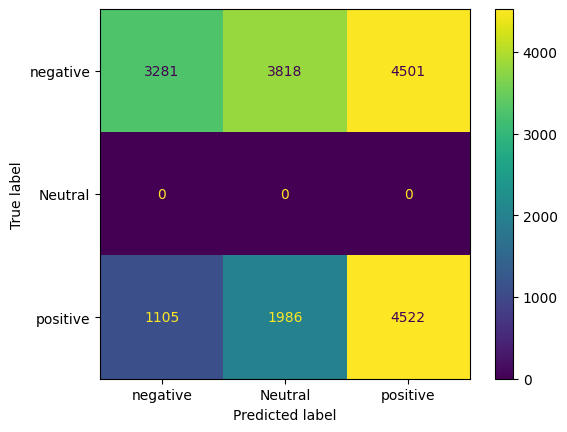

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt
confusion_matrix = sm.confusion_matrix(df_common.y_pred_nb, df_common.y_pred_bert)
cm_display = sm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'Neutral', 'positive'])
cm_display.plot()
plt.show()

## NOTE ABOUT COMPARISON OF RESULTS BETWEEN ASSIGNMENT 2 AND 3

For the training, in Assignment 2, I had trained on sentence polarity corpus which only had two target polarities: pos and neg. But in this assignment, I trained the model on Twitter Airline Sentiment Dataset from Kaggle which has 3 target polarities: positive, negative and neutral.
</br>
</br>
Coming to the confusion matrix above, The true labels are basically labels from assignment 2 and predicted labels are ones from this assignment. We can see that the row 2 has all zeroes and that is due to the differences in training datasets used. Upon Further inspection, we can see that in about 7700 cases (sum of diagonal starting from top left), both models produced similar results. In about 5600 cases, the models contradict each other. And lastly, in remaining cases, bert predicted neutral for 1986 sentences which were labelled positve by naive bayes and neutral for 3818 sentences which were labelled negative by Naive Bayes. We cannot really compare this last bucket as technically, Naive Bayes was not trained for Neutral Class. 
</br>
</br>
Wrapping up, while for a majority of sentences, Bert based BiLSTM and Naive Bayes agree on the polarity, there is a significant amount of sentences where Bert based BiLSTM model found the polarity to be positive rather than negative. This may have happened due to negation being the prominent features in Naive Bayes which discounts the context which is something that Bert captures quite well. Overall, I find Bert Based BiLSTM model to be more accurate.

In [ ]:
# storing the file for sentence wise predictions of naive bayes and bert based lstm at the below location. 
file_path = "/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 3" # Please change this path as per your drive.
file_name = "aadil_zikre_assignment_3_sentencewise_predictions_for_bert_lstm_and_naive_bayes.csv"
# df_common.to_csv(f"{file_path}/{file_name}", index=False)
df_common = pd.read_csv(f"{file_path}/{file_name}")

# Rough Trials

In [ ]:
list_vaid_tags = ('VB','JJ')
[i for i in nltk.bigrams(nltk.pos_tag(nltk.word_tokenize(df_rev.reviewText_sents.iloc[5]))) if (i[0][1].startswith(list_vaid_tags)) | (i[1][1].startswith(list_vaid_tags))]

[(('I', 'PRP'), ('bought', 'VBD')),
 (('bought', 'VBD'), ('this', 'DT')),
 (('to', 'TO'), ('go', 'VB')),
 (('go', 'VB'), ('with', 'IN')),
 (('a', 'DT'), ('light', 'JJ')),
 (('light', 'JJ'), ('blue', 'NN')),
 (('long', 'RB'), ('sleeve', 'JJ')),
 (('sleeve', 'JJ'), ('leotard', 'NN')),
 (('and', 'CC'), ('was', 'VBD')),
 (('was', 'VBD'), ('happy', 'JJ')),
 (('happy', 'JJ'), ('the', 'DT')),
 (('colors', 'NNS'), ('matched', 'VBD')),
 (('matched', 'VBD'), ('up', 'RP')),
 (('up', 'RP'), ('great', 'JJ')),
 (('great', 'JJ'), ('.', '.'))]

In [ ]:
from itertools import chain
list(chain(['a', 'b'], ['c', 'd']))

['a', 'b', 'c', 'd']

In [ ]:
nltk.word_tokenize("Aadil is My Name!!!!!!!!")

['Aadil', 'is', 'My', 'Name', '!', '!', '!', '!', '!', '!', '!', '!']

In [ ]:
nltk.pos_tag(nltk.word_tokenize("Aadil is My Name!!!!!!!!"))

[('Aadil', 'NNP'),
 ('is', 'VBZ'),
 ('My', 'PRP$'),
 ('Name', 'NN'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.')]

In [ ]:

re.findall(pattern, "AADIL name IS, MY GArnish")

['AADIL', 'IS', 'MY']

In [ ]:
"V".startswith(('VB','JJ'))

False